In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r"D:\Data Science\Music Genre Classification\train.csv")
test = pd.read_csv(r"D:\Data Science\Music Genre Classification\test.csv")
sample = pd.read_csv(r"D:\Data Science\Music Genre Classification\submission.csv")

In [4]:
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [7]:
sample.head(3)

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0


In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


In [15]:
train.describe(include = ['object']).T

,count,unique,top,freq
Artist Name,17996,9149,Backstreet Boys,69
Track Name,17996,15129,Dreams,9


In [16]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,7486.0,44.968074,17.401707,1.000000,33.000000,44.00000,57.00000,100.000
danceability,7713.0,0.548110,0.164906,0.000000,0.440000,0.54900,0.66100,0.975
energy,7713.0,0.663465,0.234822,0.000020,0.510000,0.69900,0.86300,1.000
key,6905.0,5.924692,3.238735,1.000000,3.000000,6.00000,9.00000,11.000
loudness,7713.0,-7.840913,3.982363,-36.544000,-9.527000,-6.91700,-5.18400,0.878
mode,7713.0,0.646311,0.478145,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,7713.0,0.080052,0.084228,0.000000,0.034800,0.04700,0.08330,0.960
acousticness,7713.0,0.241400,0.308006,0.000000,0.004600,0.07560,0.40600,0.995
instrumentalness,5804.0,0.170052,0.298011,0.000001,0.000092,0.00401,0.16525,0.987
liveness,7713.0,0.198331,0.161399,0.016900,0.098500,0.13100,0.26000,0.992


In [13]:
test.describe(include = ['object']).T

,count,unique,top,freq
Artist Name,7713,5010,Westlife,37
Track Name,7713,7095,Fire,7


---

### Shape

In [17]:
print(f'Training set size is {train.shape}')
print(f'Testing set size is {test.shape}')

Training set size is (17996, 17)
Testing set size is (7713, 16)


---

### Null values

In [28]:
(train.isna().sum()/train.shape[0]) * 100

Artist Name            0.000000
Track Name             0.000000
Popularity             2.378306
danceability           0.000000
energy                 0.000000
key                   11.191376
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.322072
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

<AxesSubplot:ylabel='Class'>

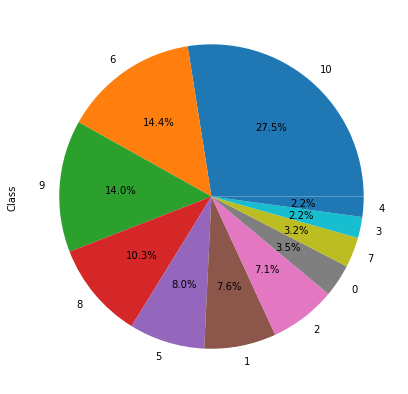

In [37]:
target = 'Class'
plt.figure(figsize = (7,7))
train[target].value_counts().plot.pie(autopct = '%1.1f%%')

Classes 10,6,9 acquire more than 50% of the data